# Redes Convolucionales

Una red convolucional es una representación de la visión humana, la cual usa filtros para extraer la información relevante de una imagen para clasificarla en cierta categoría.

# Funcionamiento

Una convolución es un filtro que pasa sobre una imagen desde la esquina superior izquierda hasta la esquina inferior derecha. Este filtro procesa uno a uno c/pixel de la imagen y extrae las características que muestran que algo es común en la imagen. Esta tecnica analiza las imágenes desde sus bordes, características, forma, etc.

Conceptos clave de este sistema son los hiperparametros definidos por:

* Kernel 
* Padding 
* Strides

El Kernel Size, se refiere a las dimensiones del filtro, que generalmente es cuadrado, por lo que solo se indica una de las dimensiones.

El Padding es el tamaño del marco (en pixeles adicionales) que se agrega a la imagen, de tal forma que los pixeles de las esquinas y bordes de la imagen original, no se pierdan del todo con la convolución.

Strides es el tamaño del paso en cada convolución. Entre mas grande sea el paso menor será la imagen resultante.

# Manejo de Imagenes

Si no se requieren los colores para identificar algo, no los uses, ya que la escala de grises solo maneja 1 escala dentro de la dimension extra, pero las fotos y los videos a color mantienen 3 debido al RGB, por lo que el tiempo de procesamiento se triplica.

De igual forma, debemos entrenar, validar y predecir con imagenes del mismo tamaño. Si son imagenes de 28 x 28 en el entrenamiento, entonces el modelo solo aceptara estas imagenes. En caso contrario podria dar error al intentar compilar, ya que el algoritmo no entiende esto.

Podemos hacer uso de la tecnica de data augmentation para generar imagenes desde diferentes perspectivas, para que el modelo entienda la clasificacion.

# Kernell

Las redes neuronales tienen una componente principal conocida como filtros, también llamados kernel. Esto se debe a que las maquinas usualmente entienden las imágenes como pixeles, números contenidos en un sistema matricial en su ancho y su largo.

El **Kernell** es simplemente una matriz que funciona de la siguiente manera:

El **Kernell** se va mueve desde la esquina superior izquierda hasta la esquina inferior derecha, paso por paso hasta completa toda la imagen haciendo una pequeña operación matemática llamada “**convolución**”.

La **convolución** es muy parecida al procedimiento del producto punto, pero no igual. Primero, el Kernell se ubica en la parte superior izquierda de la imagen y se va moviendo paso a paso ejecutando una operación matemática de multiplicación para empezar a obtener datos y patrones por cada fila y columna que compone la imagen. En este caso, la multiplicacion se hace entre los puntos equivalentes.

Ejemplo, si tenemos una imagen de m x n, y un kernel de 2x2, nuestro kernell se ira moviendo de izquierda a derecha para multiplicar los numeros correspondientes a su posicion, entonces, tendriamos lo siguiente:

$\begin{equation} \begin{bmatrix} 0,0 & 0,1 \\ 1,0 & 1,1 \end{bmatrix} \end{equation} x$ $\begin{equation} \begin{bmatrix} 0,0 & 0,1\\ 1,0 & 1,1 \end{bmatrix} \end{equation} =$ $\begin{equation} \begin{bmatrix} 0,0 x 0,0 & 0,1 x 0,1\\ 1,0 x 1,0 & 1,1 x 1,1 \end{bmatrix} \end{equation} = $ $\begin{equation} \begin{bmatrix} num1 & num2\\ num3 & num4 \end{bmatrix} \end{equation}$

Finalmente, todos los numeros de la matriz se sumaran para generar un valor unico:

$num1 + num2 + num3 + num4 = y$

si el numero es 0, entonces significa que no hay ningun borde. Entre mayor sea y, el borde sera muchisimo mas definido.

Los diferentes resultados que tenga y a lo largo de la imagen compondrán una nueva imagen con ciertas características, como por ejemplo: “los bordes verticales”. El objetivo de la convolución es empezar a obtener datos y patrones que representen todos los bordes posibles en distintas orientaciones, ya que hay 1 kernell para cada orientacion.

El ejemplo practico de esta teoria se le puede encontrar en https://setosa.io/ev/image-kernels/ o en mi notebook de Procesamiento de Imagen.

# Padding

Es un margen que se le agrega a la imagen para que al momento de realizar la operación de convolución la imagen resultante no reduzca su tamaño. Se utilizan 0 para que no altere las características de las imágenes original. Este es util para brindarle valores de referencia a los pixeles que se encuentran en el perimetro de la imagen.

# Strides

Es el tamaño del paso en cada convolución y entre más grande sea el paso menor será la imagen resultante. Este puede simplificarse como el step que da el kernel a la hora de procesar la imagen.

# Hiperparametros en la capa de convolucion

Al invocar la capa de convolución `Conv2D()`, nosotros podemos modificar los hiperparametros a traves de los siguientes argumentos:

* Filters: cuantos Kernel’s voy a utilizar.
* Kernel_size: el tamaño del Kernel.
* Strides: que se reciben como una tupla en la cual el primer parámetro registra el movimiento hacia los lados y el segundo, su movimiento hacia arriba o hacia abajo. Ejemplo: (1,1).
* Padding: recibe en un array dos valores `“valid”` y `“same”`. Si se selecciona `"same"`, entonces Keras automáticamente se encarga de todos los hiper-parámetros para que el padding sea lo suficientemente grande, tanto para que la imagen de entrada como la de salida sean exactamente las mismas y no se pierda ningún dato durante el proceso. Si se selecciona `“valid”`, entonces no aplica el “padding”. Al momento de pasar el filtro tomara el primer hasta el último pixel original de la imagen pero esto resultara en una imagen más corta en ancho y largo.

# Capa MaxPooling2D

A medida que la profundidad de la red va avanzando, tambien lo hace el número de imágenes generadas por los filtros y por lo tanto el número de imagenes a procesar ocasionara una sobrecarga computacional.

Es por esto que se invento la capa de pooling, la cual nos servirá para disminuir el tamaño de las imágenes resultantes de la convolución. Esta capa utiliza un kernel con distintos metodos:

* max: conserva el pixel mas alto de un grupo de pixeles capturados por el kernel
* average: saca el promedio de un grupo de pixeles capturados por el kernel

Estas operaciones generaran una operación de agrupamiento. Gracias a esta operación se reduce el ruido, mientras se conserva las características más importantes de la imagen.

En resumen, mientras avancemos en las capas de la redes neuronales convolucionales, se ira aumentando el número de canales en la imagen (imágenes resultantes de convolución) y se ira disminuyendo el tamaño de las imágenes debido a la capa de pooling.

Estas 2 operaciones permitirán detectar resaltar objetos específicos en una imagen, sin tener problemas de computación.

# Arquitectura de la red convolusional

Las múltiples imágenes de entradas que utiliza el modelo van a pasar a través de una red convolusional para extraer ciertas características como: bordes, texturas, etc.

Al principio estas capas son superficiales pero al adentrarse a la profundidad de la red van a ser características mucho más complejas aprovechando el aprendizaje profundo (Deep Learning).

Para analizar una imagen, la primera capa siempre debe ser convolusional, la cual agrega profundidad al input. Despues le sigue una capa de Max-Pooling. Estas suelen ir entrelazadas para reducir la complejidad, acortando el largo y ancho de las imágenes.

Esto hace que el modelo genere una imagen mucho más pequeña pero mucho más profunda en su contexto (contiene informacion mas especifica).

Después se le aplica una capa llamada “flatten” la cual lleva al arreglo o Tensor resultante a una única dimensión. Esto facilita que el apilamiento de las capas densas clasifique las imagenes.

Ejemplo de arquitectura: https://alexlenail.me/NN-SVG/LeNet.html

Calculadora para calcular la salida de una capa en CNN: https://madebyollin.github.io/convnet-calculator/

# Data Augmentation

Esta tecnica busca mejorar el rendimiento y la precisión de nuestro modelo al aumentar la cantidad y el estilo de los datos de entrada; dado que es difícil obtener y clasificar las imágenes para entrenar un modelo, dados los ambientes de una fotografía, la luz, el escenario, etc.

La tecnica de Data augmentation toma una imagen y le hace distintas modificaciones, tales como:

* Hacerle zoom
* Desplazar la imagen de sus ejes X,Y
* Aumentar el brillo
* Rotar la imagen

Ademas, tenemos un argumento llamado `fill mode`, el cual tiene 3 modos basicos:

* Wrap: crea una tira consecutiva de la imagen para completar los espacios
* Reflect: refleja la imagen sobre el eje y
* Nearest: Cuando tu rotas una imagen se puede perder informacion de los pixeles, ya quedan pixeles negros. Entonces, este modo rellena los pixeles negros con los pixeles mas cercanos a estos.

`Keras` tiene una funcion llamada `ImageDataGenerator`, la cual nos permite hacer Data augmentation a partir de los siguientes argumentos:

* `rotation_range`: son los grados de rotacion que tendra la imagen.
* `zoom_range`: es la fraccion de cuanto zoom va a hacer a la imagen.
* `fill_mode`: colocas los distintos modos para completar imagenes.
* `horizontal_flip`: muestra una imagen tipo espejo de la imagen
* `brightness_range`: cambia el brillo de la imagen a traves de un rango de brillo, el cual se define dentro de una lista.
* `Width & Height_shift_range`: se desplaza sobre el ancho y el alto de la imagen.

A modo de sumario, Data Augmentation lo que hace es mantener la foto con sus características principales pero creando imágenes distintas.

La máquina observa dos fotos “** parecidas**” pero con características similar. Esto es lo buscado y deseado al llevar a cabo un entrenamiento que pueda encontrar estas características

# Early Stopping

Esta es una tecnica que nos permite acabar el entrenamiento cuando el modelo deja de  mejorar en una metrica. El metodo `tf.keras.callbacks.earlyStopping()` nos indica cuanto tiempo puede esperar el mmodelo para que mejore una metrica.

Los argumentos de este metodo son:

* `monitor`: es la metrica que va a usar el modelo para evaluar el desempeño. 
* `patience`: es la cantidad de epocas que el modelo va a esperar para conseguir un mejor resultado en la metrica medida. Si no consigue un mejor resultado, entonces el modelo deja de entrenar.

# Checkpoint

El checkpoint es un metodo definido por `tf.keras.callbacks.ModelCheckpoint()` que permite guardar la epoca  que tuvo mejores resultados en el modelo. Usa los siguiente argumentos:

* `filepath`: es el nombre con el cual esta version del modelo va a ser guardada en un archivo.
* `verbose`: es la forma en que quieres ver el progreso del entrenamiento (estetica).
* `monitor`: es la metrica que va a usar el modelo para evaluar el desempeño.
* `save_best_only`: Es un booleano y sirve para decir que si quieres guardar la mejor version del modelo.

Despues,este modelo puede ser llamado con el metodo `model.load_weights(filename)` el cual utiliza el path del archivo que contiene al modelo guardado.

NOTA: Tando el early stopping como el checkpoint van dentro del argumento `callbacks` dentro de `model.fit()`. Esto se veria como: `model.fit(callbacks = chackpoint)`.

# Batch Normalization

Batch Normalizacion es una herramienta que facilita mucho el descenso del gradiente y optimiza las redes convolucionales.

La normalización es un procedimiento llevado a cabo sobre un conjunto de datos que busca estandarizar sus valores, reducir la cantidad de números que lo compone y en una escala homogénea de datos ayudando al descenso del gradiente “para converger mucho más rápido ” cuando se ejecuta el “Backpropagation” . La normalizacion tiene las siguientes caracteristicas:

* Valores pequeños: típicamente entre 0 a 1
* Data homogénea: todos los píxeles tienen datos en el mismo rango.

No obstante, el proceso de normalizacion tambien se puede llevar a cabo dentro de las capas ocultas de la red neuronal, a lo que se le conoce como “Batch Normalization”. Este proceso sigue la misma lógica matemática de cualquier normalización:

1. Agrupar por lotes o “batches” dentro del mismo entrenamiento de la red neuronal, en consecuencia, obtengo la media del conjunto de entrenamiento.
2. Despues, debemos obtener la varianza o desviación estándar.
3. Luego, a cada lote se le resta la media y se divide entre la desviación estándar. 

Al hacer esto dentro de las capas ocultas, tenemos data estandarizada como resultado, lo que ayudanda a converger el algoritmo.

Este proceso se crea a traves de una nueva capa neuronal, generada por `model.add(BatchNormalization())`

# Librerias

In [1]:
import tensorflow as tf
from keras.models import clone_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# 1ra Red Convolucional

## Datos

In [2]:
# Carga los datos de entrada
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Shape de las imagenes de 28 x 28
train_images.shape

(60000, 28, 28)

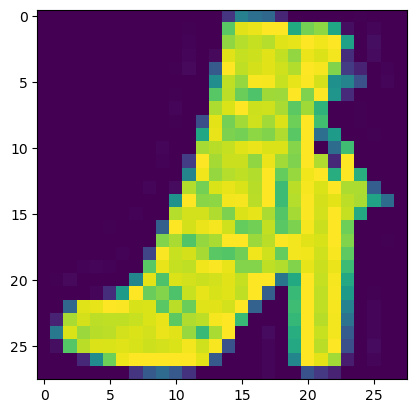

In [4]:
# Observar imagen
plt.imshow(train_images[11])

In [5]:
# Transformacion en float y estandarizacion de imagenes sobre 255
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# Reshape de imagenes con una dimension extra para escala de grises
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1], train_images.shape[2],1)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1], test_images.shape[2],1)

# Vectorizar las categorias de labels con to_categorical(), donde pones el numero de categorias que existen
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

## Crear Modelo

In [6]:
# Definimos modelo
model = tf.keras.Sequential()

# Creamos capa de convolucion
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28,28,1) ))

#Creamos capa de max pooling y de dropout
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

# Repetimos con menos filtros y sin input_shape
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

# Hacemos capa para hacer flatten las matrices
model.add(Flatten())

# Creamos capa densa con una capa de dropout
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

# Creamos capa con activacion softmax para categorizar
model.add(Dense(10, activation = 'softmax'))

# Hacemos summary del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Entrenamiento y evaluacion del modelo

In [7]:
# Definimos el early stop
early = tf.keras.callbacks.EarlyStopping(monitor= 'accuracy', patience = 1)

# Definimos el checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath= '1er_CNN.hdf5',
                                               verbose = 1,
                                               monitor = 'accuracy',
                                               save_best_only = True)

In [8]:
# Compilamos con la funcion de perdida, el optimizador y la metrica de eficiencia 
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

# Entrenamiento con early stop
model.fit(train_images, 
          train_labels,
          callbacks= early ,
          batch_size= 64,
          epochs= 10)

Epoch 1/10


2023-05-12 06:34:40.793898: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 13s 5ms/step - loss: 0.5833 - accuracy: 0.7863
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4010 - accuracy: 0.8574
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3603 - accuracy: 0.8708
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3370 - accuracy: 0.8788
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3235 - accuracy: 0.8845
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3123 - accuracy: 0.8877
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3067 - accuracy: 0.8904
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3042 - accuracy: 0.8915
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3029 - accuracy: 0.8939
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2964 - accuracy: 0.8956


In [9]:
# Compilamos con la funcion de perdida, el optimizador y la metrica de eficiencia 
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

# Entrenamiento con early stop
model.fit(train_images, 
          train_labels,
          callbacks= checkpoint ,
          batch_size= 64,
          epochs= 10)

Epoch 1/10


2023-05-12 06:35:37.876165: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


932/938 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8960
Epoch 1: accuracy improved from -inf to 0.89608, saving model to 1er_CNN.hdf5
938/938 [==============================] - 6s 5ms/step - loss: 0.2964 - accuracy: 0.8961
Epoch 2/10
937/938 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.8961
Epoch 2: accuracy did not improve from 0.89608
938/938 [==============================] - 5s 5ms/step - loss: 0.2938 - accuracy: 0.8961
Epoch 3/10
934/938 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8967
Epoch 3: accuracy improved from 0.89608 to 0.89667, saving model to 1er_CNN.hdf5
938/938 [==============================] - 5s 5ms/step - loss: 0.2918 - accuracy: 0.8967
Epoch 4/10
929/938 [============================>.] - ETA: 0s - loss: 0.2897 - accuracy: 0.8981
Epoch 4: accuracy improved from 0.89667 to 0.89815, saving model to 1er_CNN.hdf5
938/938 [==============================] - 5s 5ms/step - loss: 0.2895 - a

In [10]:
# Cargar modelo y 
m1 = model
m1.load_weights('./1er_CNN.hdf5') 
m1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.9071


[0.2581315338611603, 0.9071000218391418]